## QQplots
Author: Clara Hoffmann

In [2]:
import numpy as np
import pandas as pd
import pylab 
import scipy.stats as stats
import matplotlib.pyplot as plt

## CPL + Ridge

In [3]:
# read in val data
B_zeta = np.load('../../../data/commaai/extracted_coefficients/20201027_filtered_gaussian_resampled/Bzeta/B_zeta_val.npy')
true_z = np.load('../../../data/commaai/extracted_coefficients/20201027_filtered_gaussian_resampled/Bzeta/tr_labels_val.npy')
density_path = '../../../data/commaai/density/gaussian_density_filtered.csv'
density = pd.read_csv(density_path)

va_ridge_dir = '../../../data/commaai/va/filtered_gaussian_resampled/Ridge/'
mu_t_va = np.load(va_ridge_dir + 'mu_ts.npy')
iterations = mu_t_va.shape[0]
beta_va = np.mean(mu_t_va[int(0.95*iterations):,0:10], axis = 0)

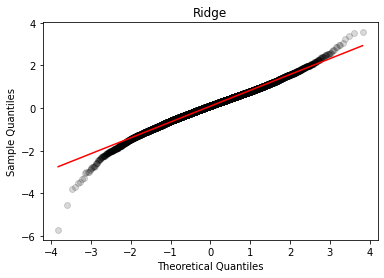

In [4]:
z_pred = (B_zeta.dot(beta_va)).reshape(10472,)
residuals = true_z - z_pred
stats.probplot(residuals, plot=plt)
ax = pylab.gca()           
line0 = ax.get_lines()[0]  
line0.set_alpha(0.15)   
line0.set_color('black') 
plt.xlabel('Theoretical Quantiles')  
plt.ylabel('Sample Quantiles')
plt.title('Ridge')
plt.savefig('qq_plot_cpl_ridge.png')

## CPL + Horseshoe

In [7]:
va_horse_dir = '../../../data/commaai/va/filtered_gaussian_resampled/Horseshoe/'
mu_t_va = np.load(va_horse_dir + 'mu_ts.npy').reshape(-1, 21)
iterations = mu_t_va.shape[0]
beta_horse = np.mean(mu_t_va[int(0.95*iterations):iterations,0:10], axis = 0)

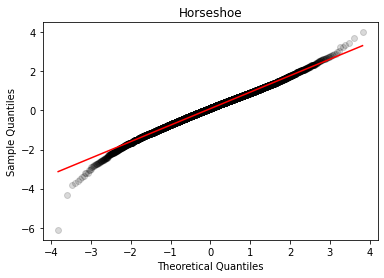

In [8]:
z_pred = (B_zeta.dot(beta_horse)).reshape(10472,)
residuals = true_z - z_pred
stats.probplot(residuals, plot=plt)
ax = pylab.gca()           
line0 = ax.get_lines()[0]  
line0.set_alpha(0.15) 
line0.set_color('black') 
plt.xlabel('Theoretical Quantiles')  
plt.ylabel('Sample Quantiles')
plt.title('Horseshoe')
plt.savefig('qq_plot_cpl_horse.png')

## CIL + Ridge

In [10]:
B_zeta = np.load('../../../data/commaai/extracted_coefficients/20201021_unrestr_gaussian_resampled/Bzeta/B_zeta_val.npy')
true_z = np.load('../../../data/commaai/extracted_coefficients/20201021_unrestr_gaussian_resampled/Bzeta/tr_labels_val.npy')
density_path = '../../../data/commaai/density/gaussian_density.csv'
density = pd.read_csv(density_path)

In [11]:
mu_t_va = np.load('../../../data/commaai/va/unfiltered_gaussian_resampled/Ridge/mu_ts.npy')
iterations = mu_t_va.shape[0]
beta_ridge = np.mean(mu_t_va[int(0.95*iterations):iterations,0:10], axis = 0)

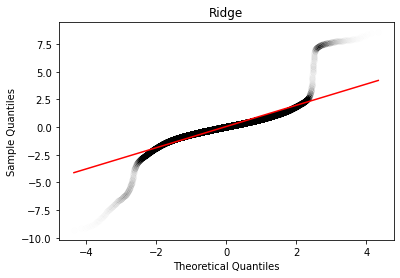

In [12]:
z_pred = (B_zeta.dot(beta_ridge)).reshape(95838,)
residuals = true_z - z_pred
stats.probplot(residuals, plot=plt)
ax = pylab.gca()           
line0 = ax.get_lines()[0]  
line0.set_alpha(0.005)   
line0.set_color('black') 
plt.xlabel('Theoretical Quantiles')  
plt.ylabel('Sample Quantiles')
plt.title('Ridge')
plt.savefig('qq_plot_cil_ridge.png')

## CIL Horseshoe

In [14]:
va_horse_dir = '../../../data/commaai/va/unfiltered_gaussian_resampled/Horseshoe/'
mu_t_va = np.load(va_horse_dir + 'mu_ts.npy').reshape(-1, 21)
iteration = mu_t_va.shape[0]
beta_horse = np.mean(mu_t_va[int(0.95*iteration):,0:10], axis = 0)

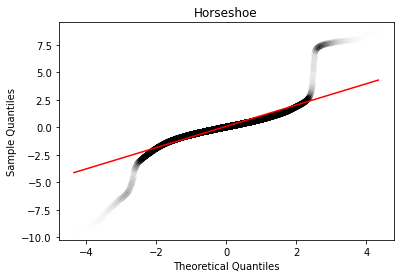

In [15]:
z_pred = (B_zeta.dot(beta_horse)).reshape(95838,)
residuals = true_z - z_pred
stats.probplot(residuals, plot=plt)
ax = pylab.gca()           
line0 = ax.get_lines()[0]  
line0.set_alpha(0.005)
line0.set_color('black')  
plt.xlabel('Theoretical Quantiles')  
plt.ylabel('Sample Quantiles')
plt.title('Horseshoe')
plt.savefig('qq_plot_cil_horse.png')

Quantile-quantile plots are used to visually test the normality assumption of the error terms
which we use to obtain a closed-form/known copula (=Gaussian copula bc error terms are gaussian).
For this assumption to be valid we want the plotted quantiles to be on the diagonal axis.